In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [207]:
df = pd.read_csv('DoctorFeePrediction.csv')
df.head()

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
0,Dr. Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000
1,Dr. Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,500
2,Dr. Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000
3,Dr. Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae &amp; Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800
4,Dr. Aisha Ahmad,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500


In [208]:
df.isnull().sum()

Doctor Name                        0
City                               0
Specialization                     0
Doctor Qualification               0
Experience(Years)                  0
Total_Reviews                      0
Patient Satisfaction Rate(%age)    0
Avg Time to Patients(mins)         0
Wait Time(mins)                    0
Hospital Address                   0
Doctors Link                       0
Fee(PKR)                           0
dtype: int64

In [209]:
df.duplicated().sum()

13

c:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


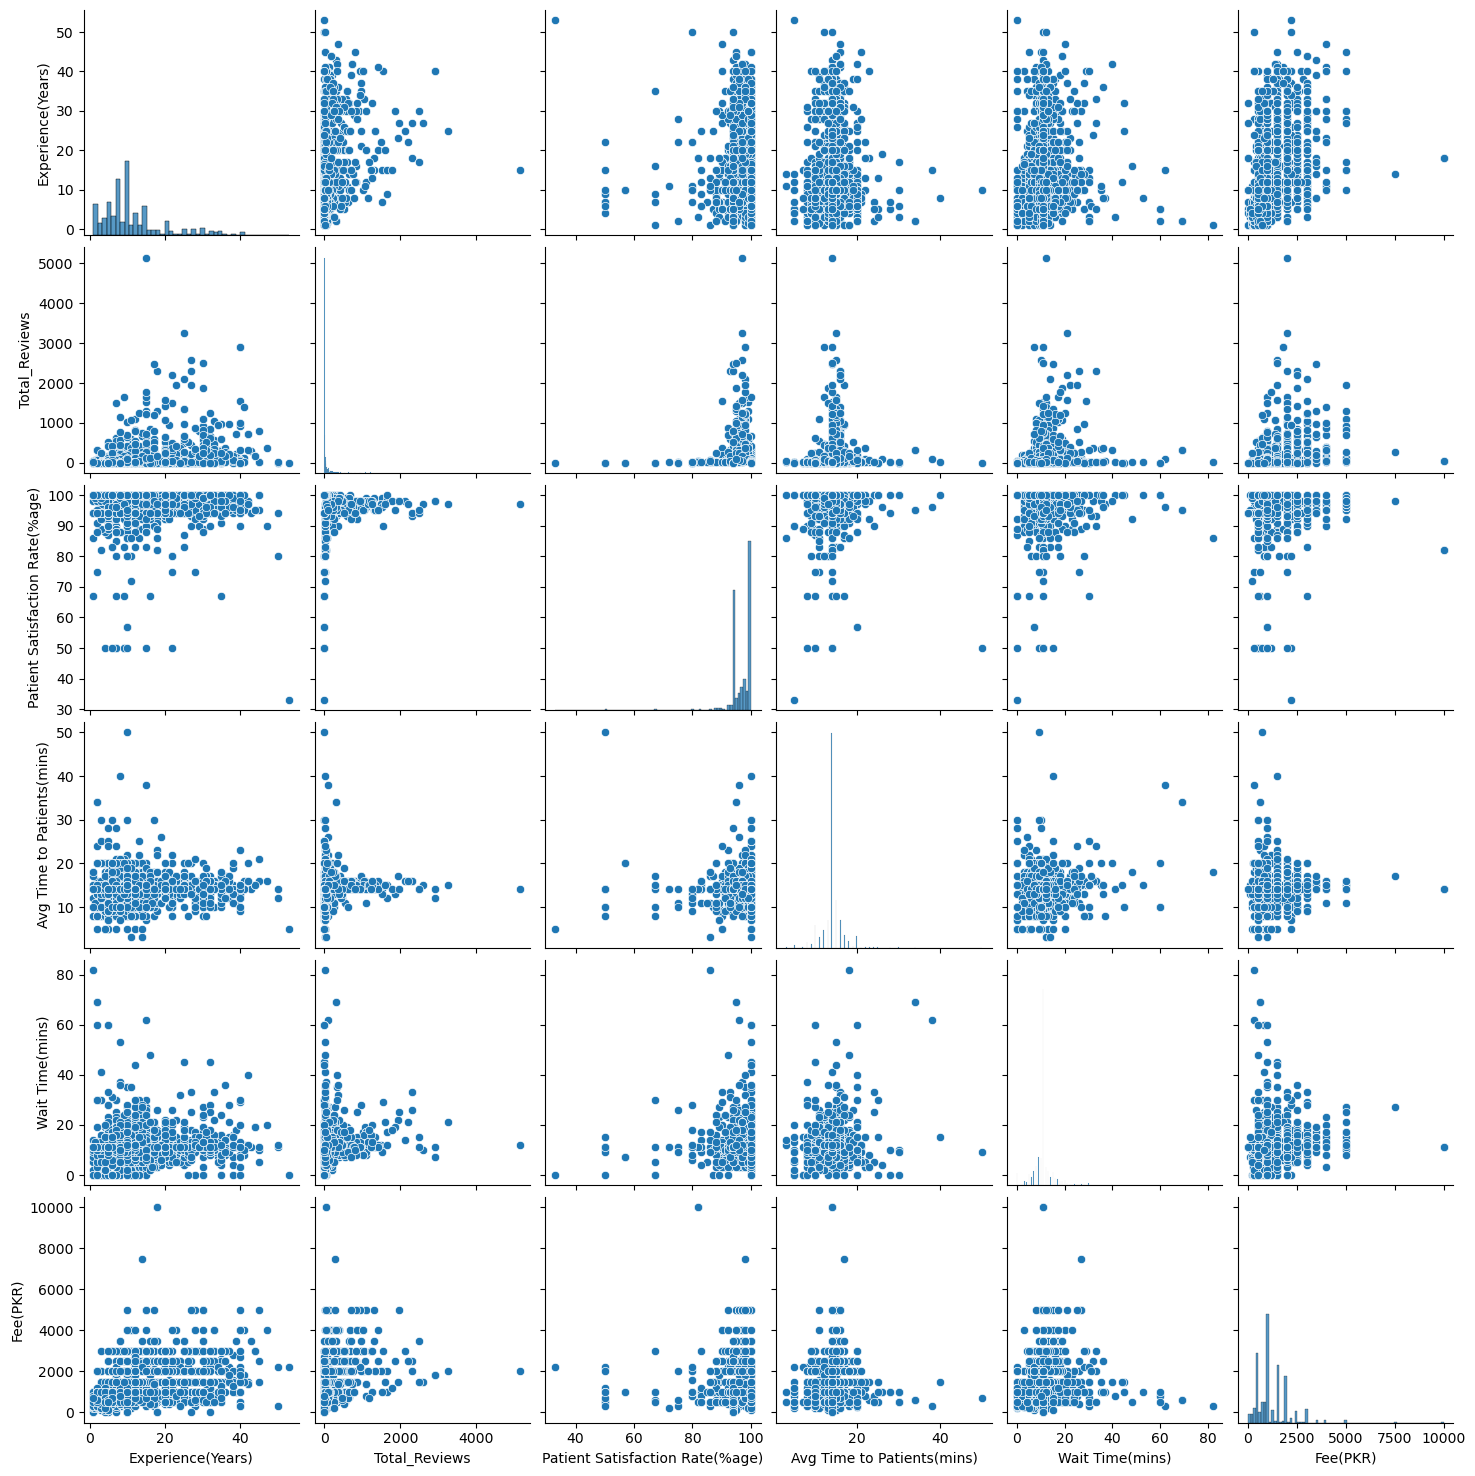

In [210]:
sns.pairplot(df)

The data doesnt have any noticeable correlations

also, some features are normally distributed, while others are skewed

In [211]:
df.drop_duplicates(inplace=True)

In [212]:
df = df[df['Fee(PKR)'] != 0]

In [213]:
df.shape

(2351, 12)

In [214]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2351 entries, 0 to 2385
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2351 non-null   object 
 1   City                             2351 non-null   object 
 2   Specialization                   2351 non-null   object 
 3   Doctor Qualification             2351 non-null   object 
 4   Experience(Years)                2351 non-null   float64
 5   Total_Reviews                    2351 non-null   int64  
 6   Patient Satisfaction Rate(%age)  2351 non-null   int64  
 7   Avg Time to Patients(mins)       2351 non-null   int64  
 8   Wait Time(mins)                  2351 non-null   int64  
 9   Hospital Address                 2351 non-null   object 
 10  Doctors Link                     2351 non-null   object 
 11  Fee(PKR)                         2351 non-null   int64  
dtypes: float64(1), int64(5), 

In [215]:
df.describe()

,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Fee(PKR)
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,11.804126,92.508294,96.680987,14.091876,11.263292,1210.347086
std,8.758499,283.436711,4.991258,2.741808,5.674280,826.976742
min,1.000000,0.000000,33.000000,3.000000,0.000000,5.000000
25%,6.000000,0.000000,94.000000,14.000000,10.000000,600.000000
50%,10.000000,8.000000,98.000000,14.000000,11.000000,1000.000000
75%,14.000000,54.000000,100.000000,15.000000,11.000000,1500.000000
max,53.000000,5147.000000,100.000000,50.000000,82.000000,10000.000000


In [216]:
qualifications = {'FCPS': 0, 'FRCS':0, 'M.S':0, 'MCPS' : 0, 'professor':0, 'DTCD':0, 'MS':0, 'FACP':0, 'FACS':0}
for i in range(df.shape[0]):
    qualifications_ = df.iloc[i]['Doctor Qualification']
    qualifications_of_one_doc =  qualifications_.split(',')
    for qualification in qualifications_of_one_doc:
        if qualification.strip(' ').startswith('FCPS'):
            qualifications['FCPS']+=1
        elif qualification.strip(' ').startswith('FRCS'):
            qualifications['FRCS']+=1
        elif qualification.strip(' ').startswith('M.S'):
            qualifications['M.S']+=1
        elif qualification.strip(' ').startswith('DTCD'):
            qualifications['DTCD']+=1
        elif qualification.strip(' ').startswith('MCPS'):
            qualifications['MCPS']+=1
        elif qualification.strip(' ').startswith('MS') or qualification.strip(' ').startswith('M.S'):
            qualifications['MS']+=1
        elif qualification.strip(' ').startswith('FACP'):
            qualifications['FACP']+=1
        elif qualification.strip(' ').startswith('FACS'):
            qualifications['FACS']+=1
        elif qualification.lower().find('professor') != -1: 
            qualifications['professor']+=1
        elif qualifications.get(qualification.strip(' ')) == None:
            qualifications[qualification.strip(' ')] = 1
        else:
            qualifications[qualification.strip(' ')]+=1
qualifications


{'FCPS': 1332,
 'FRCS': 75,
 'M.S': 3,
 'MCPS': 300,
 'professor': 3,
 'DTCD': 24,
 'MS': 110,
 'FACP': 14,
 'FACS': 19,
 'MBBS': 2197,
 'RMP': 20,
 'CFP (USA)': 1,
 'Certified in Covid 19 +': 1,
 'Certified (Aesthetic Medicine)': 1,
 'Master Of Surgery (Urology)': 2,
 'Training Geriatric Medicine UK': 1,
 'CHPE': 2,
 'MRCOG': 9,
 'General Physician': 1,
 'Aesthetic Physician': 1,
 'and MBBS': 1,
 'Diploma in Child Health (DCH)': 5,
 'ATLS': 2,
 'Certified Dermatologist': 3,
 'MD': 77,
 'Fellow (European Board Urology)': 2,
 'MRCS': 20,
 'Fellow EBOT (European Board of Orthopedic &amp; Traumatology)': 2,
 'Diploma in Pediatrics': 1,
 'Fellowship in Pediatrics': 1,
 'Member of College of Physicians and Surgeons Pakistan': 1,
 'FICS': 6,
 'FAAOS': 1,
 'Diplomate American Board of Orthopaedic Surgery': 1,
 'Diploma in Child Health': 4,
 'Master of Public Health': 1,
 'Diplomate Of American Board Of Neurology': 1,
 'MD Nephrology': 4,
 'Fellowship in Aesthetic Medicine': 1,
 'Diploma IVF a

In [217]:
sorted_freq = sorted(qualifications.items(), key=lambda item: item[1], reverse=True)
print(sorted_freq) 

[('MBBS', 2197), ('FCPS', 1332), ('MCPS', 300), ('MS', 110), ('MD', 77), ('FRCS', 75), ('DCH', 28), ('', 26), ('DTCD', 24), ('RMP', 20), ('MRCS', 20), ('MRCP', 20), ('FACS', 19), ('FACP', 14), ('MPH', 13), ('DOMS', 11), ('MRCOG', 9), ('MRCP (UK)', 9), ('PGPN', 8), ('DLO', 8), ('Diploma In Dermatology', 7), ('MRCP (Ireland)', 7), ('FICS', 6), ('DHMS', 6), ('MBBS (Gold Medalist)', 6), ('Diploma in Child Health (DCH)', 5), ('PGPN (USA)', 5), ('MBBS-FCPS', 5), ('UK)', 5), ('MRCOG (UK)', 5), ('MRCP (Medicine)', 5), ('MD(USA)', 5), ('SCE (UK)', 5), ('MRCPCH', 5), ('Diploma in Dermatology', 5), ('FICS (USA)', 5), ('Diploma in Child Health', 4), ('MD Nephrology', 4), ('DGO', 4), ('MD (USA)', 4), ('FACG (US)', 4), ('ESEGH ( European Board Of Gastroenterology &amp; Hepatology)', 4), ('FCCP (USA)', 4), ('MRCS (Glasgow)', 4), ('Diploma (Dermatology)', 4), ('MD (Medicine)', 4), ('FRCP', 4), ('MBBS (Pb)', 4), ('M.S', 3), ('professor', 3), ('Certified Dermatologist', 3), ('DIP (Sexology)', 3), ('MD (

MBBS : Bachelor of Medicine, Bachelor of Surgery

FCPS : Fellow of College of Physicians and Surgeons 

MCPS : Membership of the College of Physicians and Surgeons

MS   : Master of Surgery

MD   : Doctor of Medicine 

FRCS : Fellowship of the Royal Colleges of Surgeons

difference between FCPS & MCPS

https://study-fcps.com/fcps-and-mcps-the-key-differences-between-the-two-fellowship-programs-of-cpsp/#:~:text=MCPS%20qualified%20doctors%20can%20work,is%20completed%20in%202%20years.


according to this source, doctors with FCPS are paid more than doctors with MCPS.
this'll be verified later

In [218]:
popular_degrees = ['MBBS', 'FCPS', 'MCPS', 'MS', 'MD', 'FRCS']

condition = df['Doctor Qualification'].str.contains('|'.join(popular_degrees))
df = df[condition]

In [219]:
df.shape

(2338, 12)

In [220]:
temp_df = df[['Doctor Qualification']]
temp_df.head(5)

,Doctor Qualification
0,"MBBS , FCPS ( Otorhinolaryngologic ENT )"
1,MBBS
2,"MBBS, RMP, CFP (USA), Certified in Covid 19 +"
3,"MBBS, FCPS (Gynae &amp; Obstetrics)"
4,"MBBS, FCPS (Dermatology), Certified (Aesthetic..."


In [221]:
qualifications_df = pd.DataFrame({'MBBS':[], 'FCPS':[], 'MCPS':[], 'MS':  [], 'MD':  [], 'FRCS':[]})
qualifications_df.head()

,MBBS,FCPS,MCPS,MS,MD,FRCS


In [222]:
for  index in range(temp_df.shape[0]):
    current_qualifications = temp_df.iloc[index]['Doctor Qualification']
    row = []
    for qualification in popular_degrees:
        if current_qualifications.find(qualification) != -1:
            row.append(1)
        else:
            row.append(0)
    qualifications_df.loc[len(qualifications_df)] = row 


In [223]:
qualifications_df.head()

,MBBS,FCPS,MCPS,MS,MD,FRCS
0,1,1,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,1,0,0,0,0
4,1,1,0,0,0,0


In [224]:
qualifications_df.isna().sum()

MBBS    0
FCPS    0
MCPS    0
MS      0
MD      0
FRCS    0
dtype: int64

In [225]:
print(df.shape)
print(qualifications_df.shape)

(2338, 12)
(2338, 6)


In [226]:
df.tail()

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
2381,Dr. Amna Rizwan,LAHORE,"Eye Specialist, Eye Surgeon","MBBS, FCPS (VITREO-RETINA)",10.0,11,100,14,11,"Wahdat clinic, Wahdat Road, Lahore",https://www.marham.pk/doctors/lahore/eye-speci...,1000
2382,Dr. Misbah Fatima,OKARA,Pediatrician,"MBBS, FCPS (Pediatrics)",10.0,7,100,14,11,"Zayyan Kidney and Child Care Clinic, Okara, Okara",https://www.marham.pk/doctors/okara/pediatrici...,1000
2383,Dr. Muhammad Kashif,RAHIM-YAR-KHAN,Dermatologist,"MBBS, Fellow American Aesthetic Association.",10.0,103,95,15,12,"Moosa Skin &amp; Laser Clinic, punjab, Rahim Y...",https://www.marham.pk/doctors/sadiqabad/dermat...,1000
2384,Asst. Prof. Dr. Ahmed Ayyaz,SAHIWAL,Nephrologist,"MBBS, MD (Nephrology)",12.0,23,100,14,12,"Sahiwal International Hospital, Near General B...",https://www.marham.pk/doctors/sahiwal/nephrolo...,1500
2385,Dr. Rameez Aziz,LARKANA,Nephrologist,"MBBS, FCPS (Nephrology)",8.0,1,100,10,10,"ali hospital larkana, wagan road, Larkana",https://www.marham.pk/doctors/larkana/nephrolo...,800


In [227]:
# Check indices of both DataFrames
print("Indices of df1:", df.index)
print("Indices of df2:", qualifications_df.index)


Indices of df1: Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385],
      dtype='int64', length=2338)
Indices of df2: Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337],
      dtype='int64', length=2338)


mismatch between indices due to the removal of some records

In [228]:
df.reset_index(inplace=True) # fixing the indices mismatch

df[popular_degrees] = qualifications_df[popular_degrees].copy()

df.drop(['Doctor Name', 'Doctor Qualification', 'index'], axis=1, inplace=True)

df.rename(columns={'Experience(Years)':'EXP(YRs)',
                   'Total_Reviews' : '#Reviews',
                   f'Patient Satisfaction Rate(%age)': 'Satisfaction Rate'}, inplace=True)

del qualifications_df  

In [229]:
df.isna().sum()

City                          0
Specialization                0
EXP(YRs)                      0
#Reviews                      0
Satisfaction Rate             0
Avg Time to Patients(mins)    0
Wait Time(mins)               0
Hospital Address              0
Doctors Link                  0
Fee(PKR)                      0
MBBS                          0
FCPS                          0
MCPS                          0
MS                            0
MD                            0
FRCS                          0
dtype: int64

In [230]:
df.head()

,City,Specialization,EXP(YRs),#Reviews,Satisfaction Rate,Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR),MBBS,FCPS,MCPS,MS,MD,FRCS
0,GUJRANWALA,Ent Specialist,6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000,1,1,0,0,0,0
1,RAJAN-PUR,General Physician,1.0,0,94,14,11,No Address Available,No Link Available,500,1,0,0,0,0,0
2,MIRPUR-KHAS,General Physician,6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000,1,0,0,0,0,0
3,HYDERABAD,Gynecologist,11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800,1,1,0,0,0,0
4,LAHORE,Dermatologist,12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500,1,1,0,0,0,0


In [231]:
temp_df = df.copy()

In [232]:
threshold =  temp_df['Fee(PKR)'].mean()
fee_binary = temp_df['Fee(PKR)'] > threshold
fee_binary = fee_binary.astype(int)

In [233]:
fee_binary.sum()

828

In [234]:
fee_binary.shape

(2338,)

In [235]:
comparison_df = df[popular_degrees].copy()


In [236]:
comparison_df.head()

,MBBS,FCPS,MCPS,MS,MD,FRCS
0,1,1,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,1,0,0,0,0
4,1,1,0,0,0,0


In [237]:
print(len(df[((comparison_df['MCPS']  == 1) & (comparison_df[('FCPS')] == 0))]))
print("_______________________________\n")
print(df[((comparison_df['MCPS']  == 1) & (comparison_df[('FCPS')] == 0))]['Fee(PKR)'].min())
print(df[((comparison_df['MCPS']  == 1) & (comparison_df[('FCPS')] == 0))]['Fee(PKR)'].max())


165
_______________________________

200
4000


In [238]:
print(len(df[((comparison_df['MCPS']  == 0) & (comparison_df[('FCPS')] == 1))]))
print("_______________________________\n")
print(df[((comparison_df['MCPS']  == 0) & (comparison_df[('FCPS')] == 1))]['Fee(PKR)'].min())
print(df[((comparison_df['MCPS']  == 0) & (comparison_df[('FCPS')] == 1))]['Fee(PKR)'].max())

1167
_______________________________

5
7500


In [239]:
comparison_df['Fee'] = fee_binary

In [240]:
comparison_df.head()

,MBBS,FCPS,MCPS,MS,MD,FRCS,Fee
0,1,1,0,0,0,0,1
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0
4,1,1,0,0,0,0,1


In [241]:
# comparison_df['Fee'] = df['Fee(PKR)']

In [242]:
comparison_df.head()

,MBBS,FCPS,MCPS,MS,MD,FRCS,Fee
0,1,1,0,0,0,0,1
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0
4,1,1,0,0,0,0,1


In [243]:
def qualification_against_Fee_bar_plot(qualification):
    df_filtered = comparison_df[comparison_df[qualification] == 1]
    fee_count = df_filtered['Fee'].value_counts()
    fee_count.plot(kind='bar')
    plt.xlabel("Fee")
    plt.ylabel("Count")
    plt.title(f"Effect of {qualification} on Fee")
    plt.show()  

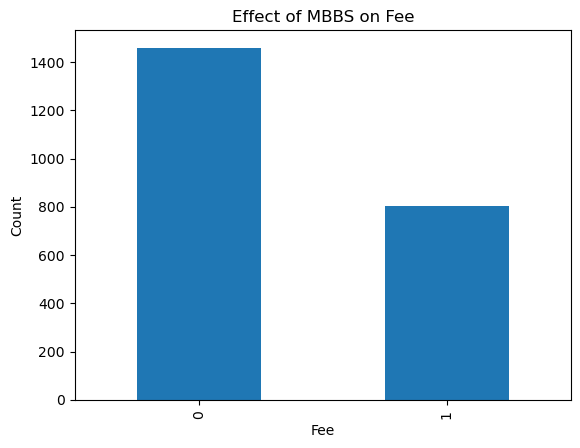

In [244]:
qualification_against_Fee_bar_plot('MBBS')

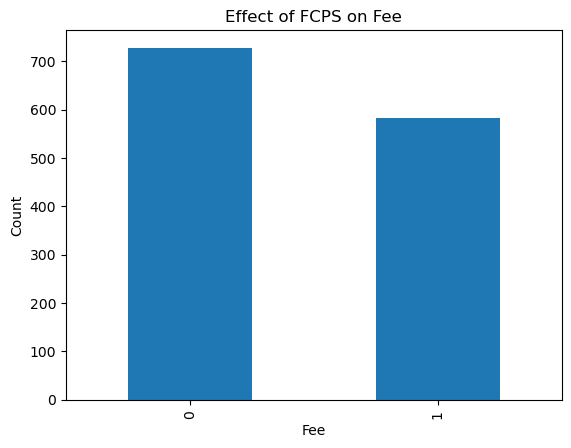

In [245]:
qualification_against_Fee_bar_plot('FCPS')


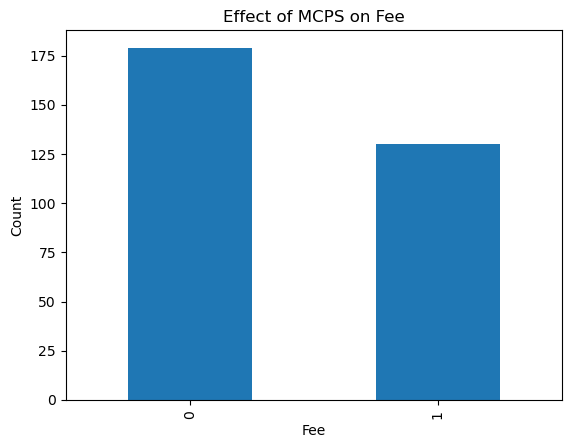

In [246]:
qualification_against_Fee_bar_plot('MCPS')

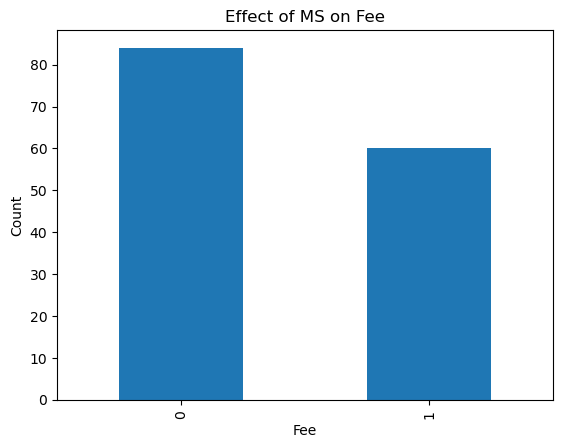

In [247]:
qualification_against_Fee_bar_plot('MS')

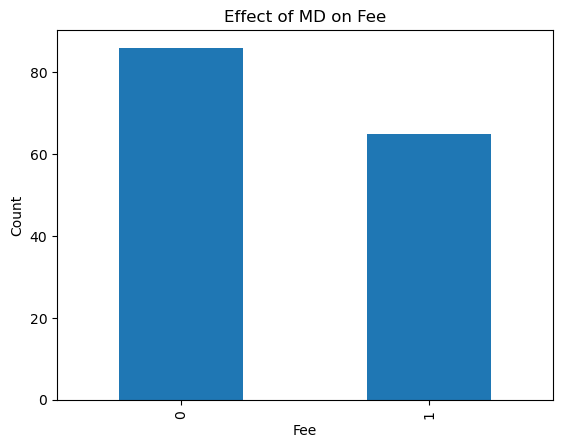

In [248]:
qualification_against_Fee_bar_plot('MD')

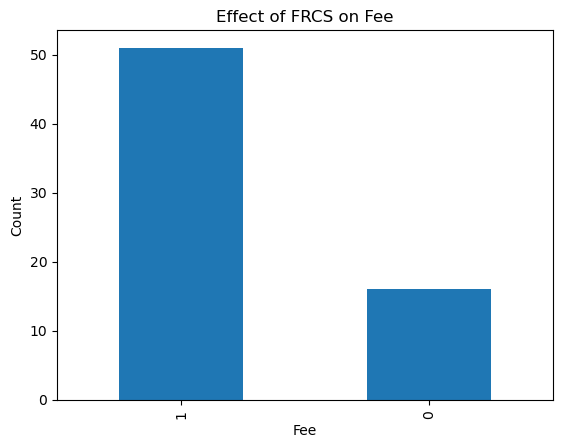

In [249]:
qualification_against_Fee_bar_plot('FRCS')

### **Insights**
* Most Doctors are paid less than the average Fee
* Qualifications and Degrees don't seem to have any effect on the Fee

In [250]:
df.head()

,City,Specialization,EXP(YRs),#Reviews,Satisfaction Rate,Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR),MBBS,FCPS,MCPS,MS,MD,FRCS
0,GUJRANWALA,Ent Specialist,6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000,1,1,0,0,0,0
1,RAJAN-PUR,General Physician,1.0,0,94,14,11,No Address Available,No Link Available,500,1,0,0,0,0,0
2,MIRPUR-KHAS,General Physician,6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000,1,0,0,0,0,0
3,HYDERABAD,Gynecologist,11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800,1,1,0,0,0,0
4,LAHORE,Dermatologist,12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500,1,1,0,0,0,0


In [251]:
len(df['City'].value_counts())

116

In [252]:
cities = df['City'].value_counts()[0:27]

In [253]:
print(cities)

City
KARACHI           150
LAHORE            149
ISLAMABAD         144
PESHAWAR          133
MULTAN            126
QUETTA            118
FAISALABAD        112
HYDERABAD          93
GUJRANWALA         90
BAHAWALPUR         77
RAHIM-YAR-KHAN     77
ABBOTTABAD         59
SIALKOT            58
SARGODHA           55
OKARA              34
GUJRAT             34
SAHIWAL            31
SWABI              31
SWAT               30
MARDAN             29
KASUR              28
SADIQABAD          26
WAH-CANTT          26
JHELUM             25
SHEIKHUPURA        21
NOWSHERA           21
LARKANA            21
Name: count, dtype: int64


In [254]:
def percentage_according_to_city(city_name):
    df_karachi_c = df['City'] == city_name
    df_karachi = df[df_karachi_c][['Fee(PKR)']]
    df_karachi_binary =  df_karachi['Fee(PKR)'] > threshold
    percentage = df_karachi_binary.sum()/df_karachi_binary.count()
    print(f'percentage of Doctors being paid above average in {city_name}: {round(percentage, 2)}%')
    return percentage

In [255]:
(df['City'] == 'KARACHI').sum()

150

In [256]:
lst = []
for val in df['City'].unique():
    if (df['City'] == val).sum() > 30:
        v = percentage_according_to_city(val)
        print(v)
        lst.append([val, round(v, 2), (df['City'] == val).sum()])

percentage of Doctors being paid above average in GUJRANWALA: 0.41%
0.4111111111111111
percentage of Doctors being paid above average in HYDERABAD: 0.18%
0.1827956989247312
percentage of Doctors being paid above average in LAHORE: 0.78%
0.7785234899328859
percentage of Doctors being paid above average in ISLAMABAD: 0.76%
0.7569444444444444
percentage of Doctors being paid above average in FAISALABAD: 0.38%
0.375
percentage of Doctors being paid above average in OKARA: 0.29%
0.29411764705882354
percentage of Doctors being paid above average in QUETTA: 0.31%
0.3050847457627119
percentage of Doctors being paid above average in KARACHI: 0.61%
0.6066666666666667
percentage of Doctors being paid above average in MULTAN: 0.59%
0.5873015873015873
percentage of Doctors being paid above average in SAHIWAL: 0.35%
0.3548387096774194
percentage of Doctors being paid above average in PESHAWAR: 0.53%
0.5338345864661654
percentage of Doctors being paid above average in BAHAWALPUR: 0.21%
0.207792207792

In [257]:
sorted_ratios = sorted(lst, key=lambda item: item[1], reverse=True)

the code in the following cell is from chatGPT

In [258]:
print('Count\t\tRatio Count')


column_widths = [max(map(len, map(str, col))) for col in zip(*sorted_freq)]

for row in sorted_freq:
    for i, elem in enumerate(row):
        print(str(elem).ljust(column_widths[i] + 2), end='')
    print()

Count		Ratio Count
LAHORE          0.78  149  
ISLAMABAD       0.76  144  
KARACHI         0.61  150  
MULTAN          0.59  126  
SIALKOT         0.55  58   
PESHAWAR        0.53  133  
GUJRANWALA      0.41  90   
GUJRAT          0.41  34   
FAISALABAD      0.38  112  
SAHIWAL         0.35  31   
SARGODHA        0.33  55   
QUETTA          0.31  118  
OKARA           0.29  34   
ABBOTTABAD      0.25  59   
BAHAWALPUR      0.21  77   
HYDERABAD       0.18  93   
RAHIM-YAR-KHAN  0.13  77   
SWABI           0.1   31   


## Insights
all cities with rate higher than 50% are listed on Wikipedia's Top 10 (Cities by GDP) list

<img src="wiki.png" width = 75% alt="title">


https://en.wikipedia.org/wiki/List_of_Pakistani_administrative_units_by_gross_state_product

In [259]:
df.head()

,City,Specialization,EXP(YRs),#Reviews,Satisfaction Rate,Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR),MBBS,FCPS,MCPS,MS,MD,FRCS
0,GUJRANWALA,Ent Specialist,6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000,1,1,0,0,0,0
1,RAJAN-PUR,General Physician,1.0,0,94,14,11,No Address Available,No Link Available,500,1,0,0,0,0,0
2,MIRPUR-KHAS,General Physician,6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000,1,0,0,0,0,0
3,HYDERABAD,Gynecologist,11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800,1,1,0,0,0,0
4,LAHORE,Dermatologist,12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500,1,1,0,0,0,0


In [260]:
import sys

In [261]:
print(type(df['FCPS'].values))
print(sys.getsizeof(df['FCPS'].values))


<class 'numpy.ndarray'>
112


In [262]:
import scipy.sparse
for column_name in popular_degrees:
    sparse_series = pd.Series(pd.arrays.SparseArray(df[column_name].values))
    print(len((sparse_series)))
    # Assigning the sparse series back to the DataFrame
    df[column_name] = sparse_series
# print(df)

2338
2338
2338
2338
2338
2338


In [264]:
print(type(df['FRCS'].values))
print(sys.getsizeof(df['FRCS'].values))


<class 'pandas.core.arrays.sparse.array.SparseArray'>
56
